   CODIGO_DA_IES                                        NOME_DA_IES  \
0          21995             Faculdade de Tecnologia Senac Curitiba   
1           1768                         FACULDADE REGIONAL SERRANA   
2           5701                    UNIVERSIDADE DO ESTADO DO AMAPÁ   
3          23261       Faculdade São Judas de São Bernardo do Campo   
4           4250  FACULDADE DE CIÊNCIAS GERENCIAIS ALVES FORTES ...   

           SIGLA CATEGORIA_DA_IES COMUNITARIA CONFESSIONAL FILANTROPICA  \
0            NaN          Privada           N            N            N   
1         FUNPAC          Privada           N            N            N   
2           UEAP          Pública           N            N            N   
3            NaN          Privada           N            N            N   
4  FACE ALFOR JF          Privada           N            N            N   

  ORGANIZACAO_ACADEMICA  CODIGO_MUNICIPIO_IBGE                MUNICIPIO  UF  \
0             Faculdade              410690

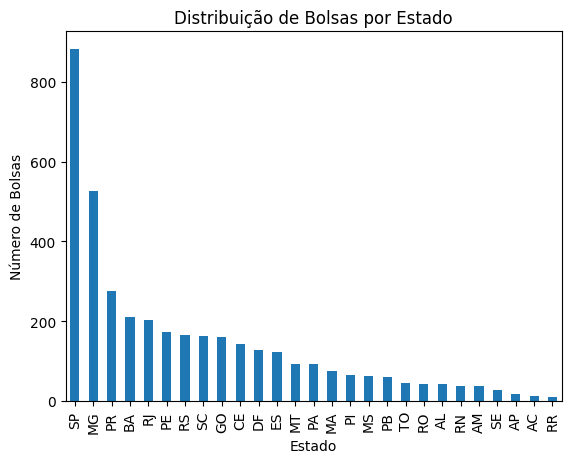

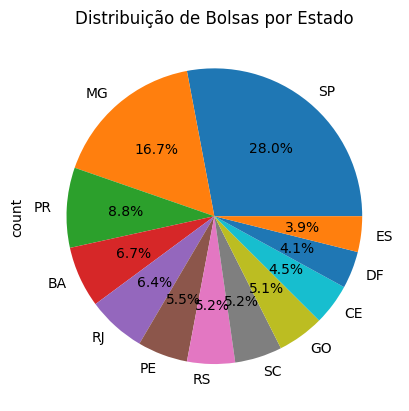

C:\Users\anaca\AppData\Local\Temp\ipykernel_11348\2411708135.py:33: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 20)
C:\Users\anaca\AppData\Local\Temp\ipykernel_11348\2411708135.py:36: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell((210 - title_width) / 2, 10, title, ln=True, align='C')
C:\Users\anaca\AppData\Local\Temp\ipykernel_11348\2411708135.py:63: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)
C:\Users\anaca\AppData\Local\Temp\ipykernel_11348\2411708135.py:64: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Tabela de Dados', ln=True, align='C')
C:\Users\anaca\AppData\Local\Te

PermissionError: [Errno 13] Permission denied: 'relatorio_bolsas.pdf'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

df = pd.read_csv('PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv')

print(df.head())
print(df.describe())
print(df.head())
print(df.info())
print(df.describe())

bolsas_por_estado = df['UF'].value_counts()
bolsas_por_estado.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Número de Bolsas')
plt.title('Distribuição de Bolsas por Estado')
plt.show()

bolsas_por_estado = df['UF'].value_counts().nlargest(12)
bolsas_por_estado.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Bolsas por Estado')
plt.show()

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Adiciona a imagem ao fundo da página
pdf.image('image.jpg', x=0, y=0, w=210, h=297)

# Centraliza o título no meio da página
pdf.set_font('Arial', 'B', 20)
title = 'Relatório Lista de Instiuições de Ensino Superior do Brasil'
title_width = pdf.get_string_width(title)
pdf.cell((210 - title_width) / 2, 10, title, ln=True, align='C')

pdf.add_page()

bolsas_por_estado = df['UF'].value_counts()
plt.figure(figsize=(10, 6))
bolsas_por_estado.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Número de Bolsas')
plt.title('Distribuição de Bolsas por Estado')
plt.savefig('barras.png', bbox_inches='tight')
plt.close()

pdf.image('barras.png', x=10, y=10, w=180)

bolsas_por_estado = df['UF'].value_counts()
plt.figure(figsize=(10, 6))
bolsas_por_estado.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Bolsas por Estado')
plt.savefig('pizza.png', bbox_inches='tight')
plt.close()

pdf.image('pizza.png', x=10, y=100, w=180)

pdf.add_page()

# Cria a tabela com os dados do CSV
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, 'Tabela de Dados', ln=True, align='C')
pdf.ln(10)

# Cabeçalho da tabela
pdf.set_font('Arial', 'B', 12)
for col in df.columns:
    pdf.cell(40, 10, col, border=1, align='C')
pdf.ln(10)

# Dados da tabela
for index, row in df.iterrows():
    for col in df.columns:
        pdf.cell(40, 10, str(row[col]), border=1, align='C')
    pdf.ln(10)

pdf.output('relatorio_bolsas.pdf', 'F')